In [4]:
# Using a Hough transform to locate the ball in a given image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os,math

In [134]:
DIR_PATH = '../nba-3d-data/harden/view_0/'
IMAGE_PATH = '../nba-3d-data/harden/view_0_alphapose/vis/frame_00008.png'

# ground truths

RGB = [(120,76,53),(139,73,56),(122,73,46),(126,84,53),(150,86,71),(128,81,62),(113,68,51),(151,100,81),(103,66,50),(100,57,50),(101,68,68),(87,54,47),(97,62,59),(124,88,77),(114,78,67),(137,82,67),(112,65,56),(123,69,56),(134,83,67),(118,78,64)]
RGB = [RGB[0]]

In [135]:
for root, dirs, files in os.walk(DIR_PATH):
    files.sort()

In [136]:
def ground_truth_distance(colors):
    #     find min distance between color and every value in rgb
    red,green,blue = colors[0],colors[1],colors[2]
    return min([math.sqrt((blue-b)**2 + (green-g)**2 + (red-r)**2) for (r,g,b) in RGB])
    

In [137]:
def get_score_for_potential(coordinate,image):
    x,y,radius = coordinate[0],coordinate[1],coordinate[2]
    height,width,_ = image.shape
    mask = np.zeros((height,width),np.uint8)
    cv.circle(mask,(x,y),radius,1,-1)
    masked_img = cv.bitwise_and(image,image,mask=mask)
    scores = []
    for row in masked_img:
        col = np.unique(row,axis=0)
        for pix in col:
            if pix.all() != 0: # for every color in the circle, get score
                pixel_score = ground_truth_distance(pix)
                scores.append(pixel_score)
    
# we have a list of distances for every pixel in this coordinate
# need to return average of bottom 50%
    scores.sort()
    avg = sum(scores[:len(scores)//2])/(len(scores)/2)
#     print(avg)
    return avg

# coor = [580,244,40]
# bgr_img = cv.imread(IMAGE_PATH,1)
# image = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
# get_score_for_potential(coor,image)

# coor = [100,400,40]
# bgr_img = cv.imread(IMAGE_PATH,1)
# image = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
# get_score_for_potential(coor,image)

In [138]:
def get_2d_ball_locations(rgb_img):
#     input image is in uint8 dtype
    bw_img = cv.cvtColor(rgb_img,cv.COLOR_BGR2GRAY)
    circles = cv.HoughCircles(bw_img,cv.HOUGH_GRADIENT,dp=1,
                              minDist=20,param1=20,param2=20,minRadius=5,maxRadius=20)
    circles = np.uint16(np.around(circles))
    
    best_circles = []
    
    for coor in circles[0]:
        score = get_score_for_potential(coor,rgb_img)
        best_circles.append((coor[0],coor[1],coor[2],score))
        
    return sorted(best_circles,key=lambda x:x[3])
    
        
    
    


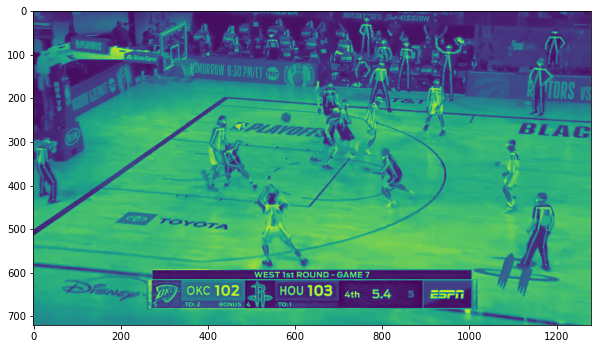

83


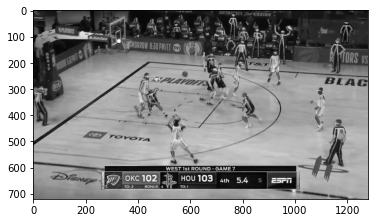

In [145]:
# new main test method
# for f in files[:1]:
#     print(f)

f = '../nba-3d-data/harden/view_0_alphapose/vis/frame_00008.png'
fig = plt.figure(figsize=(10,10))
img = cv.imread(f,0)
print(img[244][580])
rgb_im = cv.cvtColor(img,cv.COLOR_BGR2RGB)
best = get_2d_ball_locations(rgb_im)
print(best)
x,y,r,_ = best[0]
cv.circle(rgb_im,(x,y),r,(255,255,255),-1)
plt.imshow(rgb_im)
plt.show()


# [580,244,10]

    

frame_00000.png


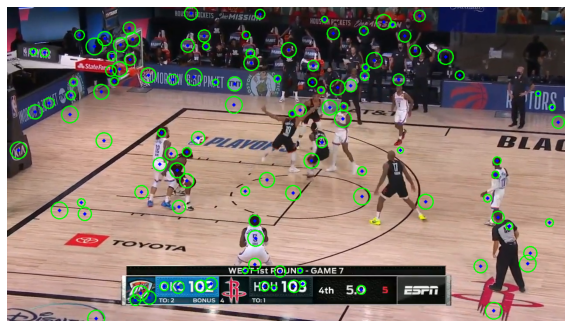

frame_00001.png


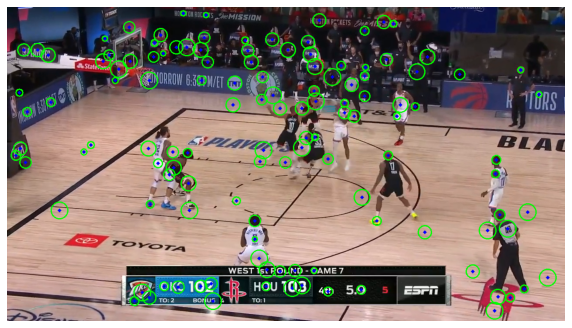

frame_00002.png


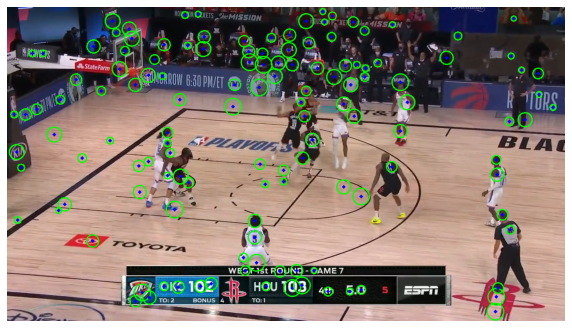

frame_00003.png


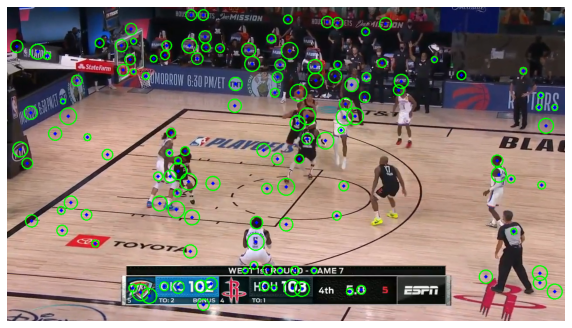

frame_00004.png


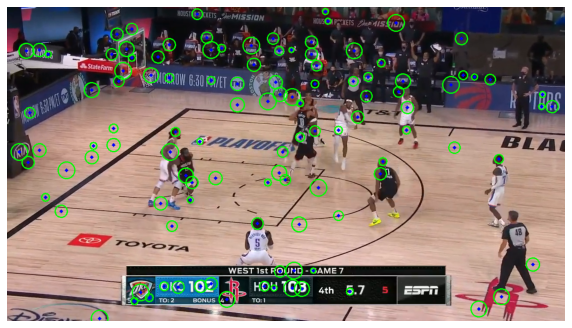

In [123]:
for f in files[:5]:
    fig = plt.figure(figsize=(10,10))
    print(f)
    img = cv.imread(DIR_PATH+f,0) # don't touch
    img = cv.medianBlur(img,5)
    
    bgr = cv.imread(DIR_PATH+f,1)
    cimg = cv.cvtColor(bgr,cv.COLOR_BGR2RGB)
    

    circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,dp=1,
                              minDist=20,param1=20,param2=20,minRadius=5,maxRadius=20)
    circles = np.uint16(np.around(circles))
#     ball = find_closest_match(circles[0],DIR_PATH+f)
#     cv.circle(cimg,(ball[0],ball[1]),ball[2],(255,255,255),-1)
    
    for i in circles[0,:]:
        cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
    plt.axis("off")
    plt.imshow(cimg)
    plt.show()



In [14]:
# CODE BELOW THIS IS FOR TESTING, IT IS NOT ORGANIZED 

In [99]:
# background subtraction on all [files], isolate out the players (hopefully) in a single view
backSub = cv.createBackgroundSubtractorMOG2()
# capture = cv.VideoCapture(cv.samples.findFileOrKeep(DIR_PATH))
# while(True):
#     ret,frame = capture.read()
#     if frame is None:
#         break

#     fgMask = backSub.apply(frame)
    
#     cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
#     cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
#                cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    
#     cv.imshow('Frame', frame)
#     cv.imshow('FG Mask', fgMask)
    
#     keyboard = cv.waitKey(30)
#     if keyboard == 'q' or keyboard == 27:
#         break

In [9]:
def get_mean_color(height,width,circle_coord,true_img):
    circle_mask = np.zeros((height,width),np.uint8)
    cv.circle(circle_mask,(circle_coord[0],circle_coord[1]),circle_coord[2],1,-1)
    return cv.mean(true_img, mask=circle_mask)[::-1]
    

In [68]:
def __ground_truth_distance(mean):
    colors = (mean[0],mean[1],mean[2])
    return sum([_ground_truth_distance(colors,val) for val in rgb])/len(rgb)

In [93]:
def test_find_closest_match(circle_coord,imgpath='../nba-3d-data/harden/view_0_alphapose/vis/frame_00008.png'):
    bgr_img = cv.imread(imgpath,1)
    true_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
    height,width,depth=true_img.shape 
    
    min_dist = float('inf')
    closest_circle = None

    circle_mask = np.zeros((height,width),np.uint8)
    cv.circle(circle_mask,(circle_coord[0],circle_coord[1]),circle_coord[2],1,-1)
    bgr_mean = cv.mean(true_img, mask=circle_mask)[::-1]
    return bgr_mean


    dist = ground_truth_distance(bgr_mean)
    if dist < min_dist: 
        closest_circle = circle_coord
        min_dist = dist
        print(dist)
        
    return closest_circle

# validate_ball_color([580,244,10],IMAGE_PATH)
    

changed circle_coord:  [580, 244, 10]
changed min_dist:  18.487358158224502


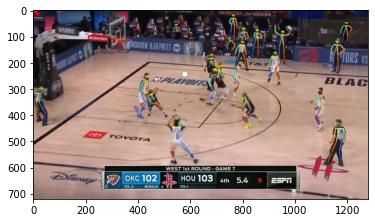

In [137]:
def find_closest_match(all_circles,imgpath):
    true_img = cv.cvtColor(cv.imread(imgpath,1), cv.COLOR_BGR2RGB)
    
#     min_dist = float('inf')
#     closest_circle = None
    
    for circle_coord in all_circles:
#         convert to list of colors
#         for each color:
#             find distance to closest color in dataset and append to another list
#         take average of bottom 50% of the dataset
#         bgr_mean = get_mean_color(height,width,circle_coord,true_img)
#         dist = ground_truth_distance(bgr_mean)
#         if dist < min_dist: 
#             closest_circle = circle_coord
#             min_dist = dist
#             print('changed circle_coord: ',circle_coord)
#             print('changed min_dist: ', min_dist)
        
    return closest_circle

ball = find_closest_match([[580,244,10]],IMAGE_PATH)
bgr_img = cv.imread(IMAGE_PATH,1)
image = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
cv.circle(image,(ball[0],ball[1]),ball[2],(255,255,255),-1)
plt.imshow(image)
plt.show()

    

circle_coord:  [580 244  10]
min_dist:  0.30120814756163533
[580 244  10]
(0.0, 53.09148264984227, 75.7602523659306, 119.84227129337539)


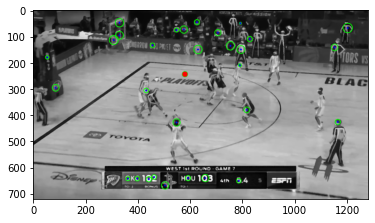

In [98]:
WORKING_IMAGE_PATH = '../nba-3d-data/harden/view_0_alphapose/vis/frame_00008.png'
REAL = [580,244,10]
FAKE = [794,150,15]

img = cv.imread(WORKING_IMAGE_PATH,0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=70,param2=20,minRadius=0,maxRadius=20)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
#         # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
t = [580,244,10]
cv.circle(cimg,(t[0],t[1]),t[2],(255,0,0),-1)

fake_best = find_closest_match(circles[0],WORKING_IMAGE_PATH)
print(fake_best)


best = test_find_closest_match(t)
print(best)





    
plt.imshow(cimg)
plt.show()

In [99]:
real_bgr = test_find_closest_match(REAL)
fake_bgr = test_find_closest_match(FAKE)
print(f'real bgr is {real_bgr}')
print(f'fake bgr is {fake_bgr}')
print(f'real distance is {ground_truth_distance(real_bgr)}')
print(f'fake distance is {ground_truth_distance(fake_bgr)}')


real bgr is (0.0, 53.09148264984227, 75.7602523659306, 119.84227129337539)
fake bgr is (0.0, 130.72355430183356, 131.60225669957686, 133.41607898448518)
real distance is 0.30120814756163533
fake distance is 96.50157003237645
